<a href="https://colab.research.google.com/github/mohammadbadi/Clustering_FE_MCA/blob/main/Code%20Sections/5.4.3%20Perplexity%20Suggestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully.

First 5 rows of the DataFrame:
   _id EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY    OCC_DOW  \
0    1  GO-20141263217    2013.0  December     31.0    365.0    Tuesday   
1   42  GO-20141262914    2014.0   January      1.0      1.0  Wednesday   
2  108  GO-20141266097    2014.0   January      2.0      2.0   Thursday   
3  126  GO-20141265947    2014.0   January      1.0      1.0  Wednesday   
4  140  GO-20141265795    2014.0   January      1.0      1.0  Wednesday   

   OCC_HOUR DIVISION                                      LOCATION_TYPE  \
0        17      D33                   Apartment (Rooming House, Condo)   
1        15      D43  Streets, Roads, Highways (Bicycle Path, Privat...   
2         1      D42  Single Home, House (Attach Garage, Cottage, Mo...   
3        15      D23  Parking Lots (Apt., Commercial Or Non-Commercial)   
4        19      D23  Parking Lots (Apt., Commercial Or Non-Commercial)   

  PREMISES_TYPE  HOOD_158               

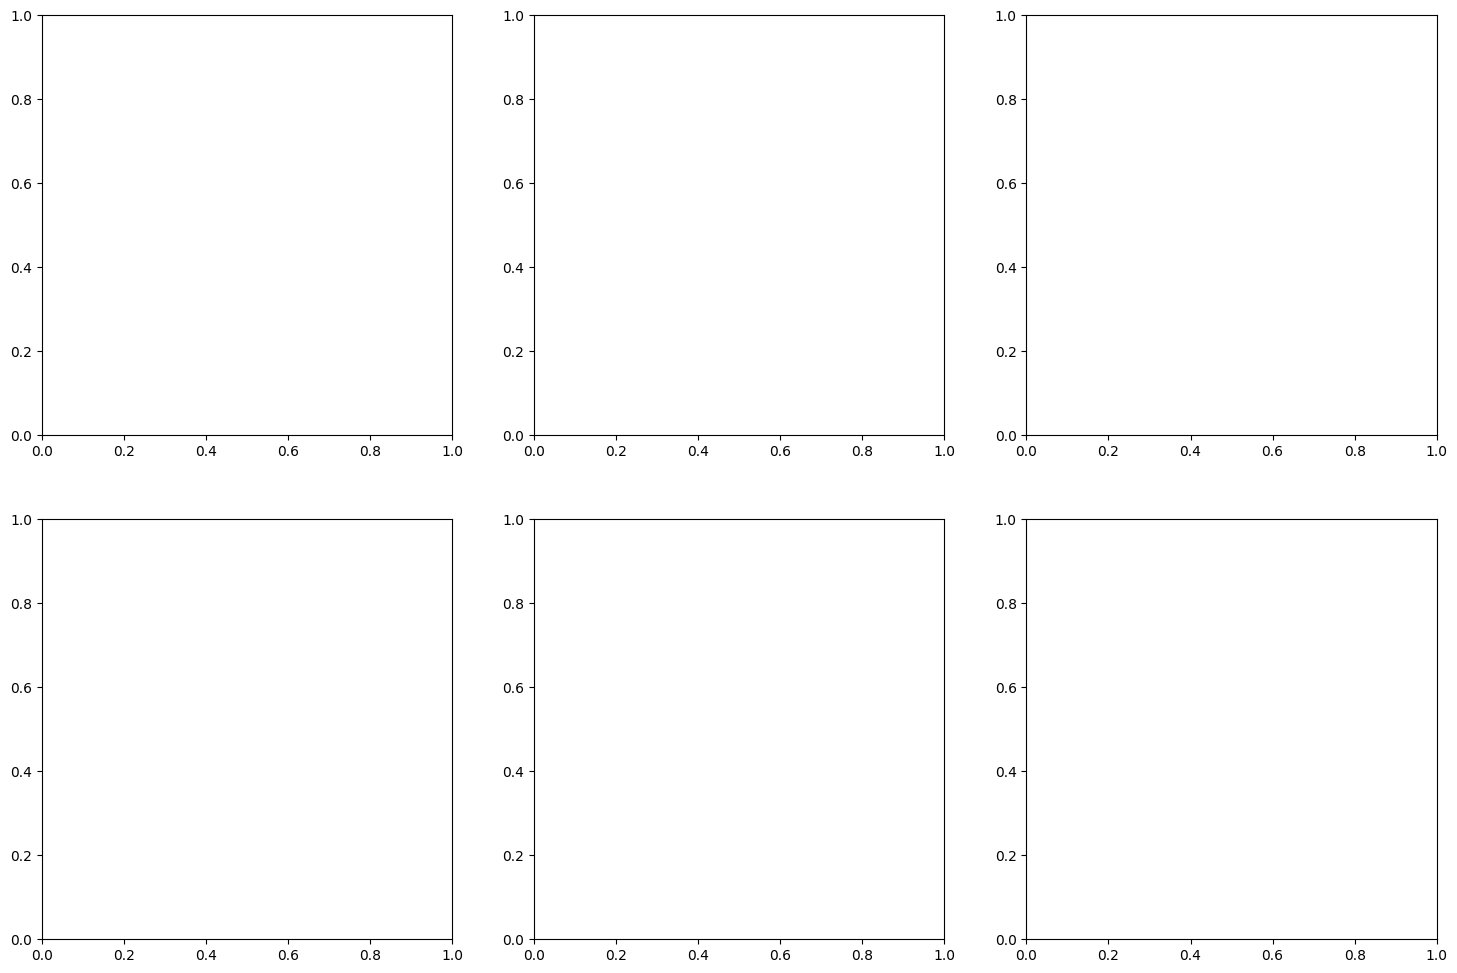

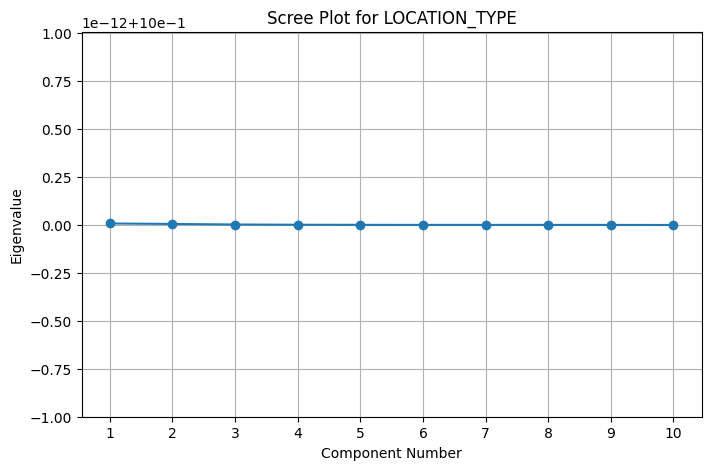

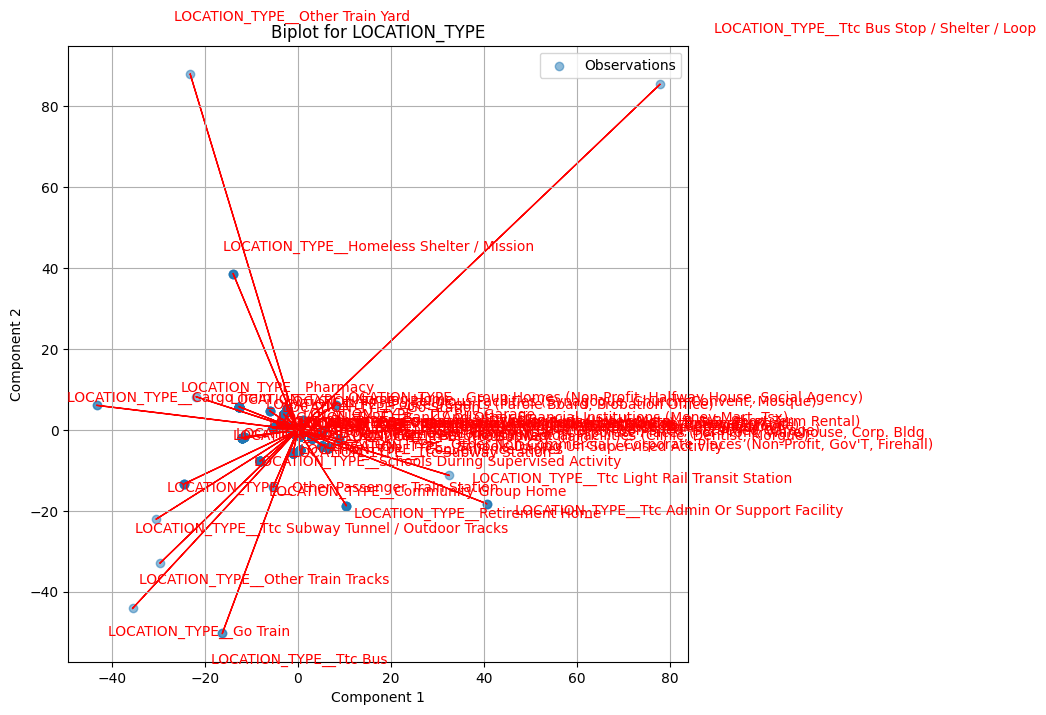

Optimal MCA results for LOCATION_TYPE:
    n_components  explained_variance  silhouette_score        inertia  \
0             1                 1.0          0.944633    7295.840820   
1             2                 1.0          0.595949   59618.436490   
2             3                 1.0          0.820663   94790.111847   
3             4                 1.0          0.888805  151531.657125   
4             5                 1.0          0.957191  190959.770206   
5             6                 1.0          0.606990  230167.192614   
6             7                 1.0          0.587173  276109.469965   
7             8                 1.0          0.685913  340817.887502   
8             9                 1.0          0.582308  386183.951273   
9            10                 1.0          0.906385  457293.537855   

                                         eigenvalues  
0                               [1.0000000000000027]  
1           [1.0000000000000053, 1.0000000000000018]  
2 

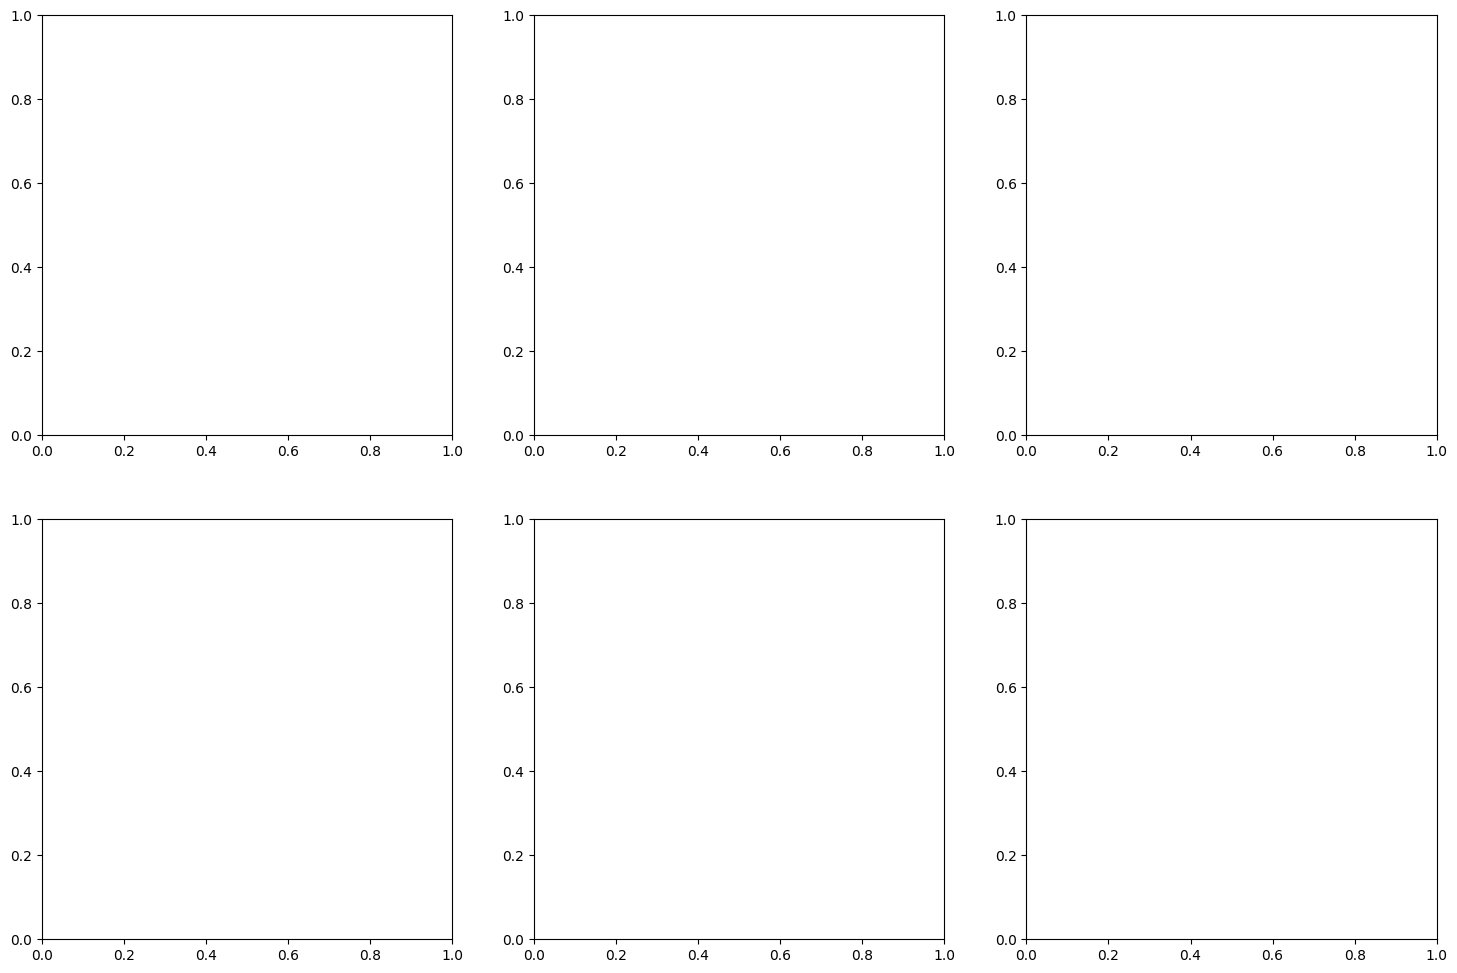

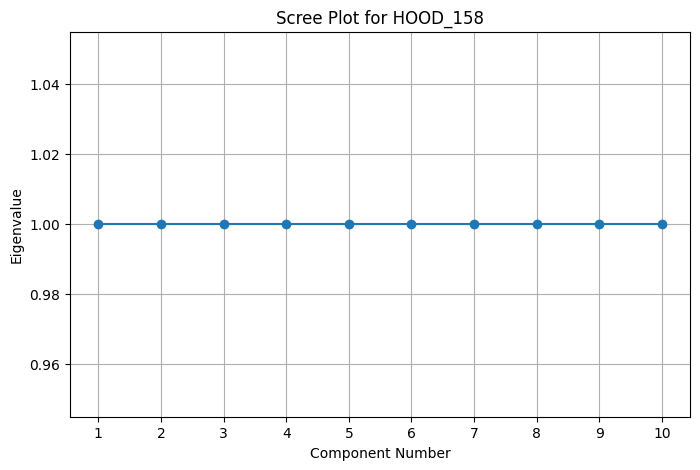

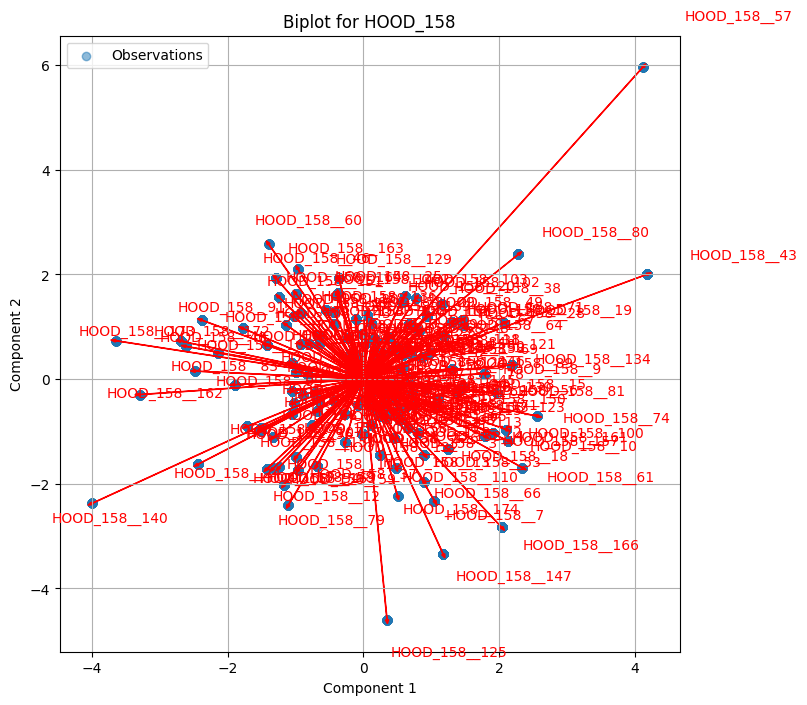

Optimal MCA results for HOOD_158:
    n_components  explained_variance  silhouette_score        inertia  \
0             1                 1.0          0.580566    4906.292431   
1             2                 1.0          0.377584   36132.947890   
2             3                 1.0          0.285881   76937.189564   
3             4                 1.0          0.212804  125056.780420   
4             5                 1.0          0.196862  170472.555664   
5             6                 1.0          0.165709  230945.066741   
6             7                 1.0          0.141677  279436.674349   
7             8                 1.0          0.133865  323241.916969   
8             9                 1.0          0.112152  384106.814640   
9            10                 1.0          0.112864  433612.808136   

                                         eigenvalues  
0                               [1.0000000000000009]  
1           [1.0000000000000009, 1.0000000000000004]  
2  [1.0

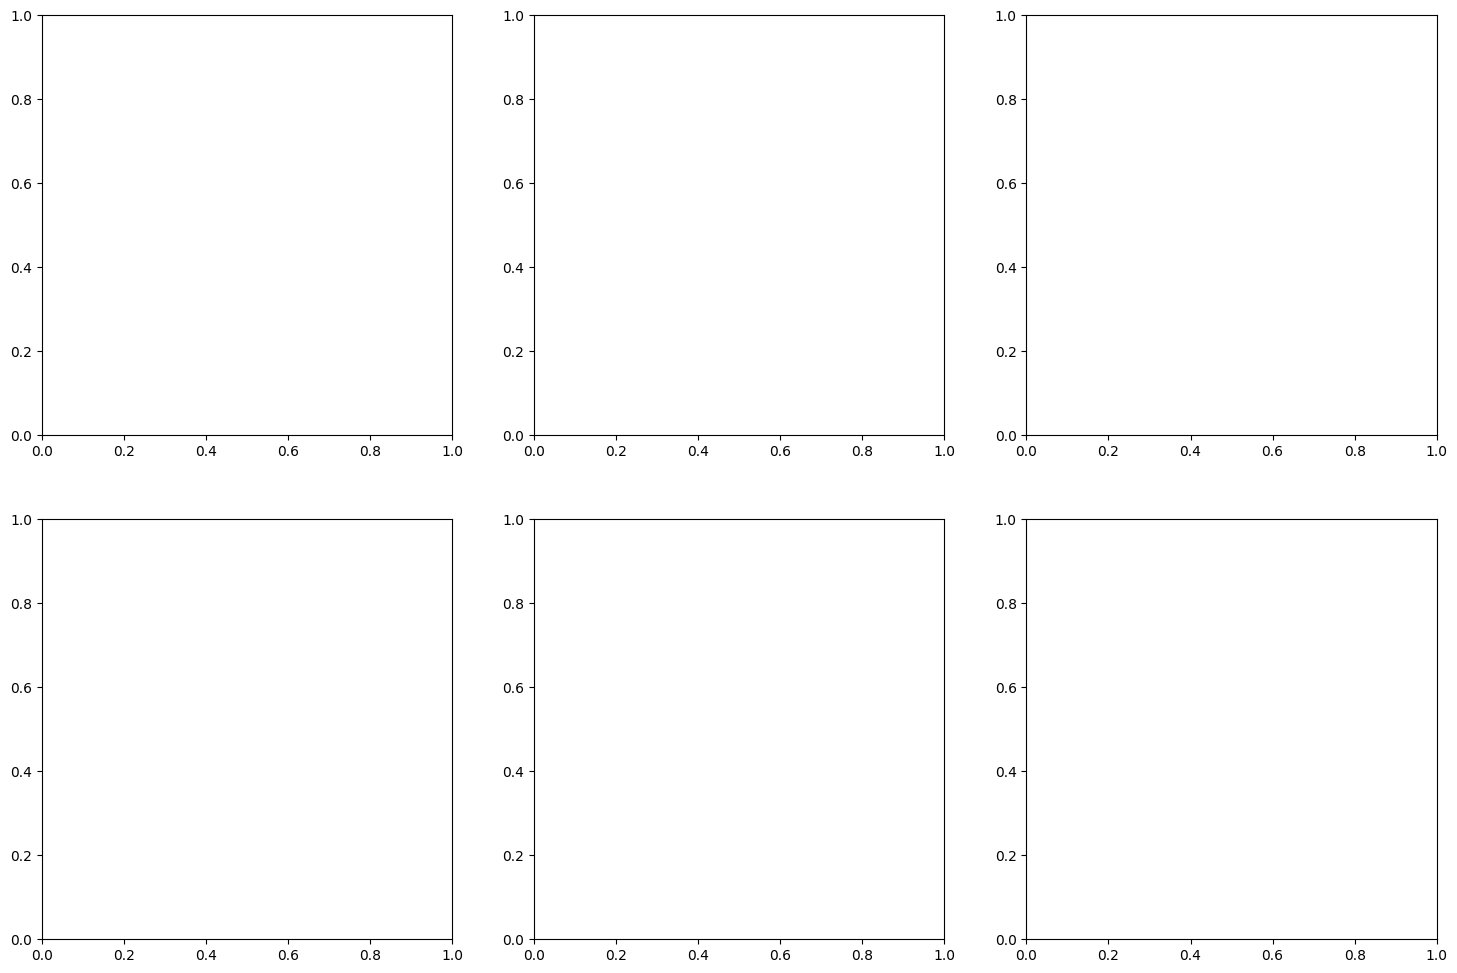

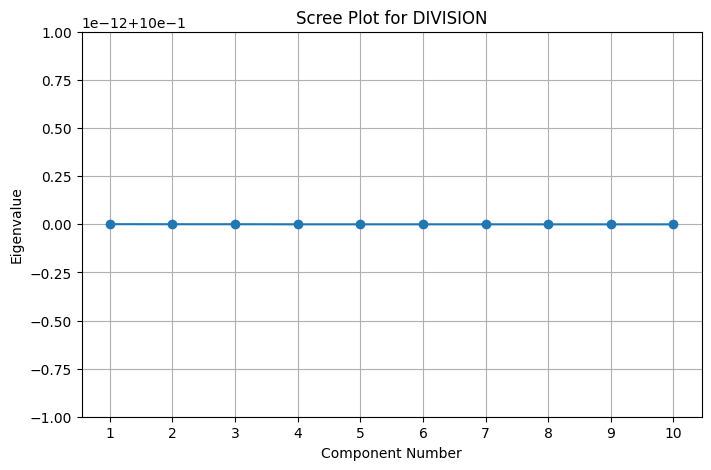

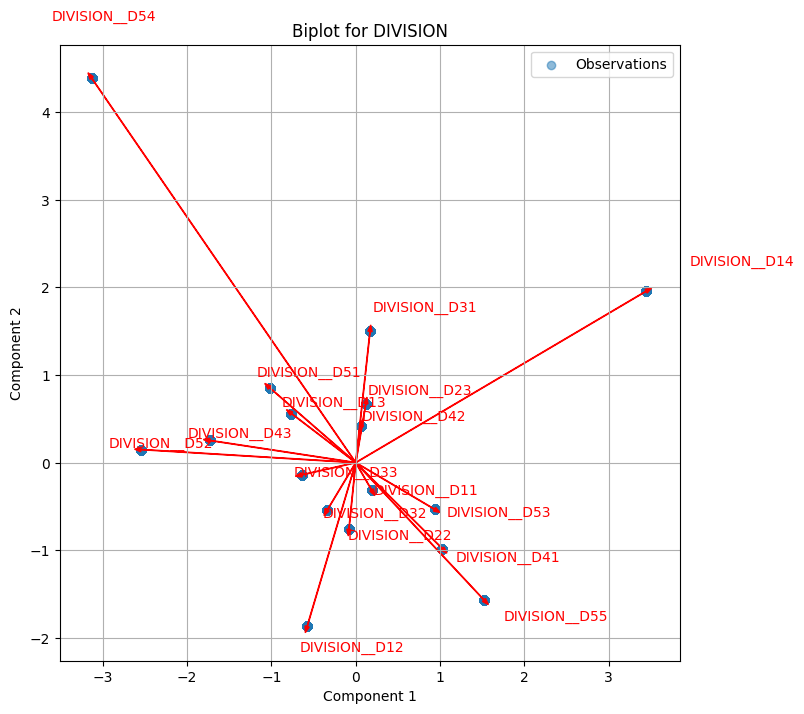

Optimal MCA results for DIVISION:
    n_components  explained_variance  silhouette_score        inertia  \
0             1                 1.0          0.745421    1491.332132   
1             2                 1.0          0.614318   19807.639319   
2             3                 1.0          0.462332   48116.591710   
3             4                 1.0          0.394959  104667.635423   
4             5                 1.0          0.275596  141449.356505   
5             6                 1.0          0.371860  188070.024633   
6             7                 1.0          0.507974  231286.159168   
7             8                 1.0          0.273380  282087.989163   
8             9                 1.0          0.368395  304172.078441   
9            10                 1.0          0.327174  355641.647568   

                                         eigenvalues  
0                               [1.0000000000000013]  
1           [1.0000000000000013, 1.0000000000000009]  
2  [1.0

In [18]:
# Install prince if not already installed (uncomment the next line if needed)
# !pip install prince -qqq

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prince import MCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Load the Data
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering/refs/heads/main/Output_CSV/Final_Data.csv"
try:
    df = pd.read_csv(url)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Display first few rows to verify
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# 2. Convert columns to integers and create new numeric columns
# Convert OCC_MONTH to integer and create OCC_MONTH_NUM
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['OCC_MONTH_NUM'] = df['OCC_MONTH'].map(month_mapping).astype(int)

# Convert OCC_HOUR to integer (assuming it's already 0-23)
df['OCC_HOUR'] = df['OCC_HOUR'].astype(int)

# Convert OCC_DOW to integer and create OCC_DOW_NUM
dow_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
df['OCC_DOW_NUM'] = df['OCC_DOW'].map(dow_mapping).astype(int)

print("\nColumns converted to integers and new numeric columns created.")
print(df[['OCC_MONTH', 'OCC_MONTH_NUM', 'OCC_HOUR', 'OCC_DOW', 'OCC_DOW_NUM']].dtypes)
print(df[['OCC_MONTH', 'OCC_MONTH_NUM', 'OCC_HOUR', 'OCC_DOW', 'OCC_DOW_NUM']].head())

# 3. Cyclical Encoding (Sine/Cosine)
def cyclical_encode(df, col, period):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / period)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / period)
    return df

df = cyclical_encode(df, 'OCC_MONTH_NUM', 12)
df = cyclical_encode(df, 'OCC_HOUR', 24)
df = cyclical_encode(df, 'OCC_DOW_NUM', 7)

print("\nCyclical encoding applied.")

# 4. MCA for Location, Hood, and Division
features_for_mca = ['LOCATION_TYPE', 'HOOD_158', 'DIVISION']

# Function to perform MCA, evaluate metrics, and plot scree and biplot
def perform_mca_and_evaluate(df, feature, max_components=10):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Create subplots for all metrics if needed

    print(f"\nPerforming MCA for feature: {feature}")

    results = []

    # Loop through n_components for evaluation
    for n_components in range(1, max_components + 1):
        print(f"\nAnalysis for n_components = {n_components}")

        # Perform MCA
        mca = MCA(n_components=n_components, random_state=42)
        mca_result = mca.fit(df[[feature]])

        # Calculate explained variance ratio using eigenvalues
        total_inertia = sum(mca_result.eigenvalues_)
        explained_variance_ratio = sum(mca_result.eigenvalues_[:n_components]) / total_inertia

        # Transform data using MCA components
        mca_transformed = mca.transform(df[[feature]])

        # Scale MCA components for clustering
        scaler = StandardScaler()
        mca_scaled = scaler.fit_transform(mca_transformed)

        # Apply K-Means clustering
        kmeans = KMeans(n_clusters=5, random_state=42)
        labels = kmeans.fit_predict(mca_scaled)

        # Compute Silhouette Score and inertia
        silhouette_score_value = silhouette_score(mca_scaled, labels)
        inertia = kmeans.inertia_

        # Get eigenvalues for current n_components
        eigenvalues = mca_result.eigenvalues_[:n_components]

        # Print statistics
        print(f"1. Explained Variance: {explained_variance_ratio:.4f}")
        print(f"2. Silhouette Score: {silhouette_score_value:.4f}")
        print(f"3. Inertia: {inertia:.4f}")
        print(f"4. Eigenvalues: {', '.join([f'{ev:.4f}' for ev in eigenvalues])}")
        print("-" * 50)

        # Store results for summary table
        results.append({
            'n_components': n_components,
            'explained_variance': explained_variance_ratio,
            'silhouette_score': silhouette_score_value,
            'inertia': inertia,
            'eigenvalues': eigenvalues,
        })

    # Create and print summary table
    summary_df = pd.DataFrame(results)
    print("\nSummary of MCA Results:")
    print(summary_df[['n_components', 'explained_variance', 'silhouette_score', 'inertia']])

    # Plot Scree Plot using maximum components
    mca_full = MCA(n_components=max_components, random_state=42)
    mca_full_result = mca_full.fit(df[[feature]])
    eigenvalues_full = mca_full_result.eigenvalues_
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(eigenvalues_full) + 1), eigenvalues_full, marker='o')
    plt.title(f"Scree Plot for {feature}")
    plt.xlabel("Component Number")
    plt.ylabel("Eigenvalue")
    plt.xticks(range(1, len(eigenvalues_full) + 1))
    plt.grid(True)
    plt.show()

    # Plot Biplot using 2 components (if available)
    if max_components >= 2:
        mca_2 = MCA(n_components=2, random_state=42)
        mca_2.fit(df[[feature]])
        row_coords = mca_2.row_coordinates(df[[feature]])
        col_coords = mca_2.column_coordinates(df[[feature]])
        plt.figure(figsize=(8, 8))
        plt.scatter(row_coords[0], row_coords[1], alpha=0.5, label="Observations")
        # Plot arrows for variable coordinates
        for i in col_coords.index:
            plt.arrow(0, 0, col_coords.loc[i, 0], col_coords.loc[i, 1],
                      color='r', width=0.005, head_width=0.05)
            plt.text(col_coords.loc[i, 0]*1.15, col_coords.loc[i, 1]*1.15, i, color='r')
        plt.title(f"Biplot for {feature}")
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.grid(True)
        plt.legend()
        plt.show()

    return summary_df

# Perform MCA and Evaluate for each feature
optimal_n_components = {}
for feature in features_for_mca:
    optimal_n_components[feature] = perform_mca_and_evaluate(df, feature, max_components=10)
    print(f"Optimal MCA results for {feature}:\n", optimal_n_components[feature])

print("\nMCA analysis completed with additional plots.")

# Display Optimal Component Numbers for easy reference
print("\nOptimal number of MCA components per feature (based on your metrics):")
for feature, summary in optimal_n_components.items():
    print(f"- {feature}:")
    print(summary[['n_components', 'explained_variance', 'silhouette_score', 'inertia']])


In [33]:
import pandas as pd
import numpy as np
from prince import MCA
from sklearn.preprocessing import StandardScaler
from google.colab import files  # Only needed in Colab

# Load the original DataFrame
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering/refs/heads/main/Output_CSV/Final_Data.csv"
df_original = pd.read_csv(url)
print("Data loaded successfully.")

# Work on a copy for feature engineering
df = df_original.copy()

# -------------------------------
# Numeric Conversion & Cyclical Encoding
# -------------------------------

# Create numeric columns
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
dow_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
df['OCC_MONTH_NUM'] = df['OCC_MONTH'].map(month_mapping).astype(int)
df['OCC_HOUR'] = df['OCC_HOUR'].astype(int)
df['OCC_DOW_NUM'] = df['OCC_DOW'].map(dow_mapping).astype(int)

# Compute cyclical encoding features (new columns)
df['OCC_MONTH_NUM_sin'] = np.sin(2 * np.pi * df['OCC_MONTH_NUM'] / 12)
df['OCC_MONTH_NUM_cos'] = np.cos(2 * np.pi * df['OCC_MONTH_NUM'] / 12)
df['OCC_HOUR_sin']  = np.sin(2 * np.pi * df['OCC_HOUR'] / 24)
df['OCC_HOUR_cos']  = np.cos(2 * np.pi * df['OCC_HOUR'] / 24)
df['OCC_DOW_NUM_sin'] = np.sin(2 * np.pi * df['OCC_DOW_NUM'] / 7)
df['OCC_DOW_NUM_cos'] = np.cos(2 * np.pi * df['OCC_DOW_NUM'] / 7)

# Save the names of the new cyclical columns
cyclical_cols = ['OCC_MONTH_NUM_sin', 'OCC_MONTH_NUM_cos',
                 'OCC_HOUR_sin', 'OCC_HOUR_cos',
                 'OCC_DOW_NUM_sin', 'OCC_DOW_NUM_cos']

print("\nCyclical encoding applied. Sample of encoded columns:")
print(df[cyclical_cols].head())

# -------------------------------
# MCA on Categorical Features
# -------------------------------

# Define a function to compute MCA without dropping the original column
def perform_mca(dataframe, feature, n_components):
    try:
        mca = MCA(n_components=n_components, random_state=42)
        mca_result = mca.fit_transform(dataframe[[feature]])
        mca_columns = [f"{feature}_MCA_{i+1}" for i in range(n_components)]
        # Add MCA columns to dataframe without dropping the original feature
        dataframe[mca_columns] = mca_result
        print(f"\nMCA for '{feature}' computed. Head of MCA output:")
        print(dataframe[mca_columns].head())
        return mca_columns
    except Exception as e:
        print(f"Error performing MCA on {feature}: {e}")
        return []

# Apply MCA on the selected categorical features
mca_cols_location = perform_mca(df, 'LOCATION_TYPE', 5)
mca_cols_hood     = perform_mca(df, 'HOOD_158', 1)
mca_cols_division = perform_mca(df, 'DIVISION', 1)

# -------------------------------
# One-Hot Encoding for PREMISES_TYPE
# -------------------------------

# Compute one-hot encoded columns without dropping the original PREMISES_TYPE column
premises_onehot = pd.get_dummies(df['PREMISES_TYPE'], prefix='PREMISES_TYPE')
print("\nOne-hot encoded features for 'PREMISES_TYPE':")
print(premises_onehot.head())

# Append the one-hot encoded columns to our feature set
df = pd.concat([df, premises_onehot], axis=1)

# -------------------------------
# Prepare New Features DataFrame and Scaling (Optional)
# -------------------------------

# Gather names of all new features computed
new_feature_cols = cyclical_cols + mca_cols_location + mca_cols_hood + mca_cols_division + list(premises_onehot.columns)

# (Optional) Scale the new features if desired
scaler = StandardScaler()
new_features_scaled = pd.DataFrame(scaler.fit_transform(df[new_feature_cols]),
                                   columns=new_feature_cols,
                                   index=df.index)

# -------------------------------
# Combine Original Data with New Features
# -------------------------------

# We keep all original columns and then append the scaled new features.
# If you prefer unscaled new features, replace new_features_scaled with df[new_feature_cols].
df_final = pd.concat([df_original, new_features_scaled], axis=1)

# Save the final DataFrame to a CSV file
output_file = "FE_Encoded.csv"
df_final.to_csv(output_file, index=False)
print(f"\nProcessed data saved to {output_file}")
print("\nFirst 5 rows of the final DataFrame:")
print(df_final.head())

try:
    files.download(output_file)  # This line only works in Google Colab
except Exception as e:
    print("Not running in Colab, download skipped.")


Data loaded successfully.

Cyclical encoding applied. Sample of encoded columns:
   OCC_MONTH_NUM_sin  OCC_MONTH_NUM_cos  OCC_HOUR_sin  OCC_HOUR_cos  \
0      -2.449294e-16           1.000000     -0.965926     -0.258819   
1       5.000000e-01           0.866025     -0.707107     -0.707107   
2       5.000000e-01           0.866025      0.258819      0.965926   
3       5.000000e-01           0.866025     -0.707107     -0.707107   
4       5.000000e-01           0.866025     -0.965926      0.258819   

   OCC_DOW_NUM_sin  OCC_DOW_NUM_cos  
0         0.974928        -0.222521  
1         0.433884        -0.900969  
2        -0.433884        -0.900969  
3         0.433884        -0.900969  
4         0.433884        -0.900969  

MCA for 'LOCATION_TYPE' computed. Head of MCA output:
   LOCATION_TYPE_MCA_1  LOCATION_TYPE_MCA_2  LOCATION_TYPE_MCA_3  \
0             0.401424             0.538111             0.132926   
1             0.002694            -0.066761             0.143997   
2    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>